import libary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

rubah dataset

In [2]:
df = pd.read_csv('datasets_IBM_clean_ready.csv')

In [3]:
df_final = df[['MonthlyIncome',
               'OverTime',
               'YearsWithCurrManager',
               'Age',
               'DistanceFromHome',
               'TotalWorkingYears',
               'YearsAtCompany',
               'Attrition'      
         ]]
df_final.shape

(1470, 8)

In [4]:
df.to_html('dataset_clean.html')

split data

In [5]:
x = df_final.drop(columns='Attrition')
y = df_final['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =False)

In [6]:
#applying model Logistic Regression with hyperparameter
logre_top = LogisticRegression(solver = 'saga', penalty = 'none', max_iter = 10, class_weight = 'balanced').fit(x_train, y_train)

In [7]:
#Logistic Regression
logre_pred_top = logre_top.predict(x_test)

In [8]:
#confusion matrix
conmat_logre_top = confusion_matrix(y_test, logre_pred_top)
conmat_logre_top

array([[169,  76],
       [ 14,  35]], dtype=int64)

evaluasi model

In [9]:
labels = ['Negatif', 'Positif']

              precision    recall  f1-score   support

     Negatif       0.92      0.69      0.79       245
     Positif       0.32      0.71      0.44        49

    accuracy                           0.69       294
   macro avg       0.62      0.70      0.61       294
weighted avg       0.82      0.69      0.73       294



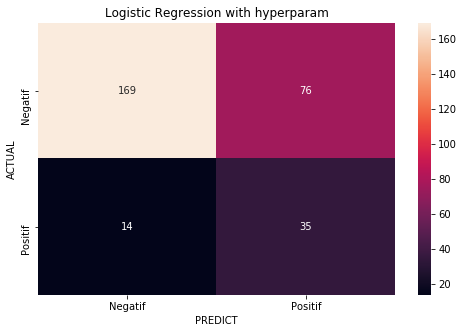

In [10]:
print(classification_report(y_test, logre_pred_top, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conmat_logre_top, annot=True, fmt=".0f", ax=ax)

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression with hyperparam')
plt.xlabel("PREDICT")
plt.ylabel("ACTUAL")
plt.show()

melihat kalsifikasi report dan visualisai confuse matrix

In [11]:
print(logre_top.score(x_train,y_train))

0.6981292517006803


In [12]:
print(logre_top.score(x_test,y_test))

0.6938775510204082


In [13]:
robust = RobustScaler()

In [14]:
joblib.dump(logre_top, 'final_model')
joblib.dump(robust, 'final_scaler')

['final_scaler']

### conclusion

untuk sementara Logistic Regression adalah model terbaik yang punya nilai recall cukup bagus di banding model lainnya yang saya coba.

Kita rangkum score dari model terakhir ini
1. model ini tidak under maupun over kalu diliat dari score XY train dan test
2. mempunyai tingkat akurasi cukup tinggi dibanding menggunakan model lain yaitu 69% | (TP+TN/TP+TN+FP+FN)204/294
3. model memiliki nilai presision positif 32% & presision negatif 92%
4. model memiliki nilai recall positif 71% dan recall negatif 69%

dilihat dari sisi bisnis bagi perusahaan kita harus menghindari adanya salah prediksi yang menyatakan bahwa karyawan itu tidak keluar namun kenyataannya keluar, karna akan berimbas ke masalah biaya dan waktu dihabiskan untuk wawancara dan menemukan pengganti,  sementara karyawan baru harus terbiasa dengan peran barunya di perusahaan tersebut.
https://www.americanprogress.org/wp-content/uploads/2012/11/CostofTurnover.pdf

Indikator kuat karyawan pergi :
* <b>Monthly Income</b> : Karyawan dengan upah rendah cenderung meninggalkan perusahaan. Oleh karena itu, upaya harus dilakukan untuk mengumpulkan informasi tentang tolak ukur industri di pasar lokal saat ini untuk menentukan apakah perusahaan memberikan upah yang kompetitif.
* <b>Over Time</b> : Karyawan yang bekerja lembur lebih cenderung meninggalkan perusahaan. Oleh karena itu, berbagai upaya harus diambil untuk menjangkau scope projects secara tepat dengan dukungan dan tenaga yang memadai untuk mengurangi penggunaan lembur.
* <b>Age</b> : Karyawan dengan kelompok usia yang relatif muda 25~35 lebih cenderung untuk pergi. Oleh karena itu, harus dilakukan upaya untuk mengartikulasikan dengan jelas visi jangka panjang perusahaan dan karyawan muda yang sesuai dengan visi tersebut, serta memberikan insentif dalam bentuk jalur yang jelas misalnya memberikan promosi atau bonus.
* <b>YearsWithCurrManager</b> : jumlah karyawan di bawah asisten manajer yang menunjukkan tingkat turnover tinggi: ini dapat menunjukkan bahwa struktur organisasi mungkin perlu ditinjau kembali untuk meningkatkan efisiensi
* <b>DistanceFromHome</b> : Karyawan yang tinggal jauh dari rumah lebih cenderung meninggalkan perusahaan. Oleh karena itu, harus dilakukan upaya untuk memberikan dukungan dalam bentuk transportasi perusahaan untuk sekelompok karyawan yang tinggal di daerah yang sama, atau dalam bentuk Tunjangan Transportasi.
* <b>TotalWorkingYears</b> : Karyawan yang lebih berpengalaman cenderung tidak pergi. Namun Karyawan yang memiliki pengalaman antara 5-8 tahun harus diidentifikasi berpotensi memiliki risiko lebih tinggi untuk pergi.
* <b>YearsAtCompany</b> : Karyawan yang merayakan peringatan dua tahun mereka harus diidentifikasi berpotensi memiliki risiko lebih tinggi untuk pergi.


dalam kelompok katagori ini, Selain langkah-langkah yang disarankan untuk setiap fitur yang tercantum di atas, harus dibuatnya pertemuan secara langsung antara perwakilan HR dan karyawan. langkah ini dapat dimulai untuk karyawan berisiko menengah dan tinggi untuk membahas kondisi kerja di perushaan ini, dan juga melakukan pertemuan dengan Manajer dari masing-masing karyawan tersebut untuk membahas lingkungan kerja di dalam tim dan apakah langkah-langkah dapat diambil untuk memperbaikinya.
